# Task 04 - Traffic Accident Analysis


---
Goal: Analyze traffic accident data to identify patterns based on road conditions, weather, and time of day, and visualize accident hotspots & contributing factors.


# Upload The Zip File

In [1]:
from google.colab import files
uploaded = files.upload()

Saving global_traffic_accidents.csv to global_traffic_accidents.csv


# Import Necessory Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Dataset

In [3]:
df=pd.read_csv("/content/global_traffic_accidents.csv")
df

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving
...,...,...,...,...,...,...,...,...,...,...,...
9995,2d26c7e2,2023-01-10,18:41,"Paris, France",-41.344055,109.335620,Storm,Wet,3,10,Distracted Driving
9996,4d236cfd,2023-04-04,16:48,"São Paulo, Brazil",-60.765148,-10.432225,Storm,Dry,3,9,Weather Conditions
9997,1d32722f,2024-09-30,14:43,"Beijing, China",-11.161278,-72.164379,Snow,Under Construction,2,3,Weather Conditions
9998,64722572,2024-10-27,18:34,"Sydney, Australia",-17.153524,20.803006,Storm,Under Construction,4,3,Drunk Driving


# Display 1st 5 rows

In [4]:
df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


# Basic information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accident ID        10000 non-null  object 
 1   Date               10000 non-null  object 
 2   Time               10000 non-null  object 
 3   Location           10000 non-null  object 
 4   Latitude           10000 non-null  float64
 5   Longitude          10000 non-null  float64
 6   Weather Condition  10000 non-null  object 
 7   Road Condition     10000 non-null  object 
 8   Vehicles Involved  10000 non-null  int64  
 9   Casualties         10000 non-null  int64  
 10  Cause              10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


# Summary Statistics

In [6]:
df.describe()

,Latitude,Longitude,Vehicles Involved,Casualties
count,10000.000000,10000.000000,10000.000000,10000.00000
mean,-0.543557,0.338573,2.999100,4.98820
std,51.917928,103.379168,1.408935,3.13015
min,-89.985688,-179.961984,1.000000,0.00000
25%,-45.426619,-88.231733,2.000000,2.00000
50%,-1.080556,-0.682727,3.000000,5.00000
75%,44.137309,89.973059,4.000000,8.00000
max,89.990081,179.981695,5.000000,10.00000


# Data Cleaning & Preprocessing

In [7]:
df.isnull().sum()

,0
Accident ID,0
Date,0
Time,0
Location,0
Latitude,0
Longitude,0
Weather Condition,0
Road Condition,0
Vehicles Involved,0
Casualties,0


In [8]:
df.duplicated().sum()

np.int64(0)

# EDA(Exploratory Data Analysis)

# Countplot: Accidents by Time of Day

/tmp/ipython-input-9-1017782997.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


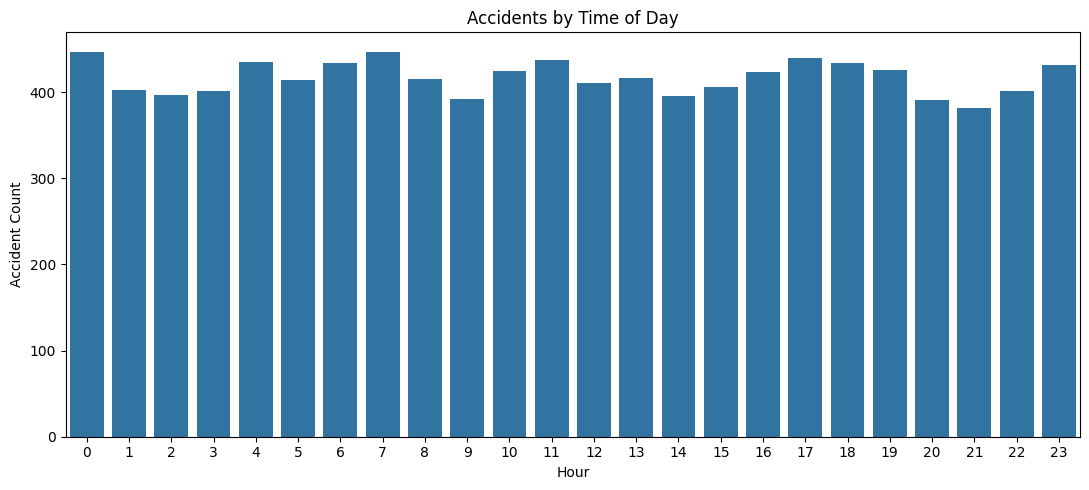

In [9]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

plt.figure(figsize=(11, 5))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Time of Day')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

# Pie Chart: Weather Condition Distribution

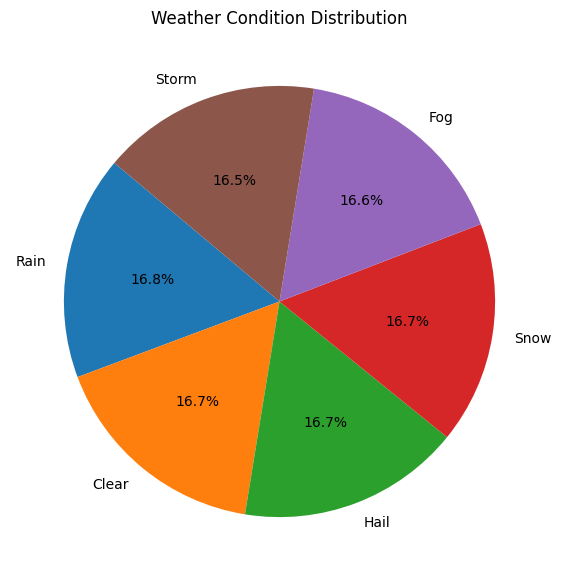

In [10]:
weather_counts = df['Weather Condition'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Weather Condition Distribution')
plt.axis
plt.show()

# Grouped Bar Chart: Road Condition vs Accident Severity

/tmp/ipython-input-11-895530407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Road Condition', palette='Set2')


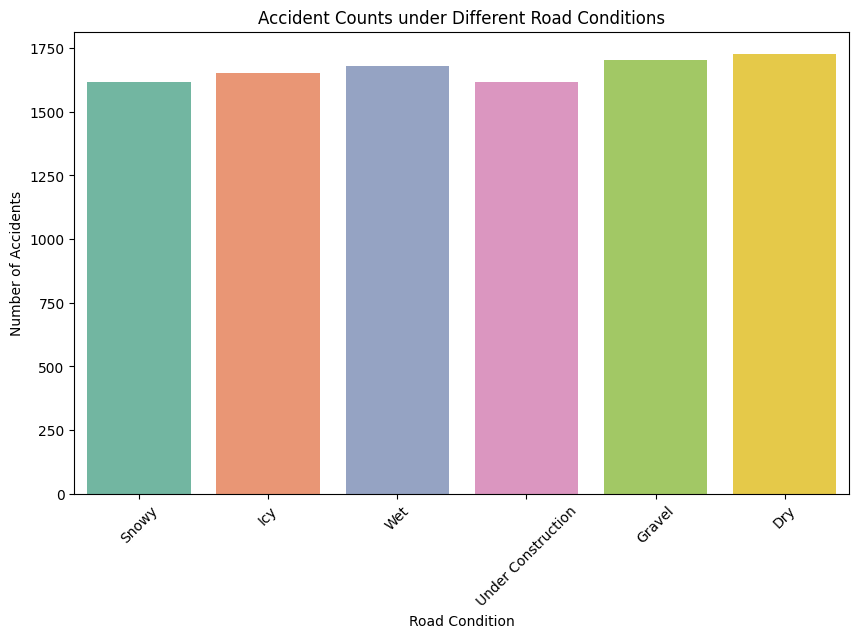

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Road Condition', palette='Set2')
plt.title('Accident Counts under Different Road Conditions')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Boxplot: Casualties by Day Of The Week

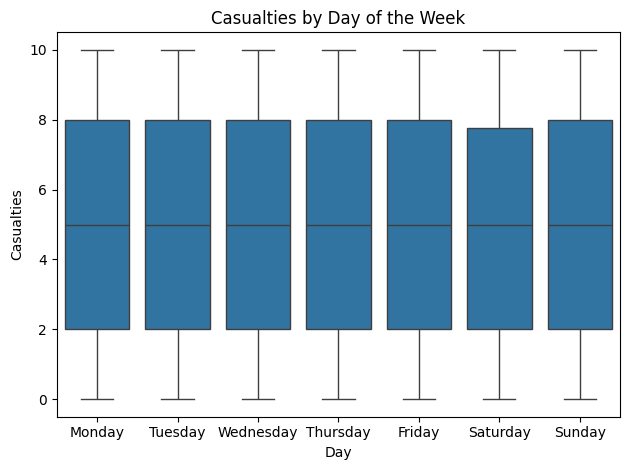

In [12]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Day'] = df['Date'].dt.day_name()
sns.boxplot(data=df, x='Day', y='Casualties', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Casualties by Day of the Week')
plt.tight_layout()
plt.show()

# Horizontal Bar Chart: Number of Accidents by Top 10 Countries

/tmp/ipython-input-13-1331902564.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


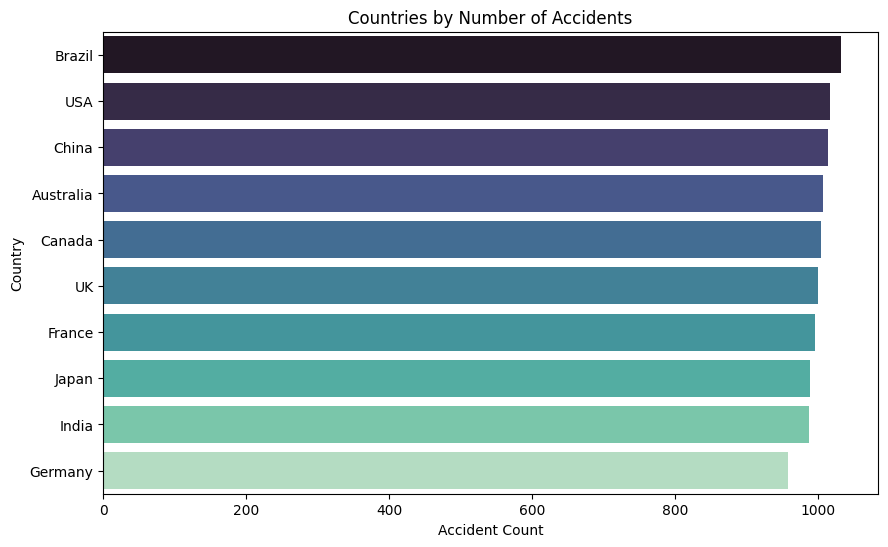

In [13]:
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())
top_countries = df['Country'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title('Countries by Number of Accidents')
plt.xlabel('Accident Count')
plt.ylabel('Country')
plt.show()

# Line Plot: Accident Distribution over Days

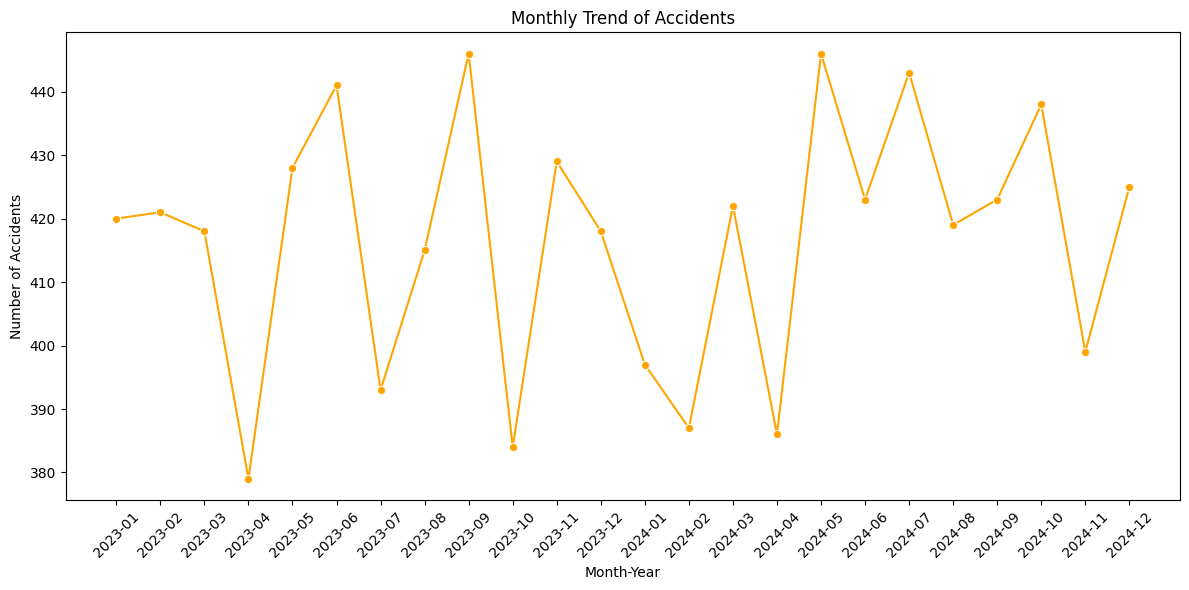

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month_Year'] = df['Date'].dt.to_period('M')

monthly_trend = df.groupby('Month_Year').size().reset_index(name='Accident_Count')
monthly_trend['Month_Year'] = monthly_trend['Month_Year'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trend, x='Month_Year', y='Accident_Count', marker='o', color='orange')
plt.xticks(rotation=45)
plt.title('Monthly Trend of Accidents')
plt.xlabel('Month-Year')
plt.ylabel('Number of Accidents')
plt.grid(False)
plt.tight_layout()
plt.show()

# Heatmap of Correlation Matrix

Text(0.5, 1.0, 'Accident Hotspots (Density Map)')

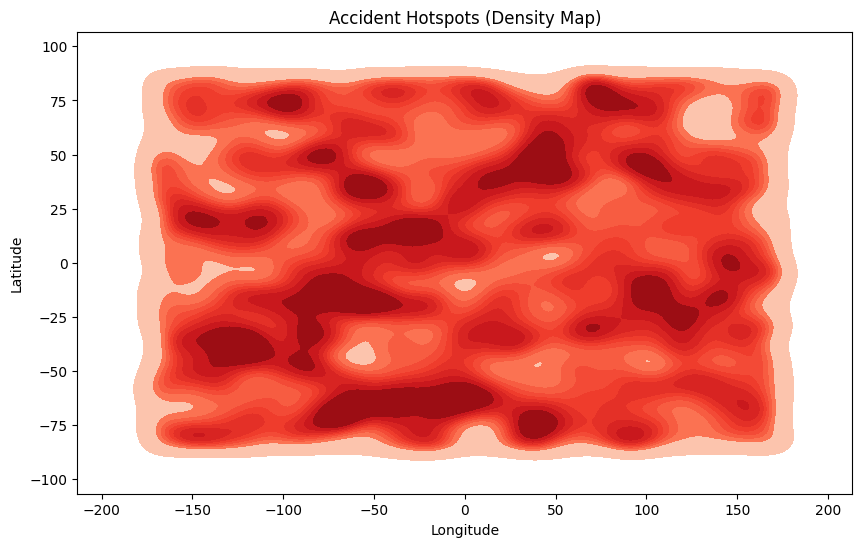

In [15]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=np.number)
sns.kdeplot(x=df['Longitude'], y=df['Latitude'], cmap="Reds", fill=True, bw_adjust=0.5)
plt.title('Accident Hotspots (Density Map)')

# Histogram: Accidents by Hour of the Day

/tmp/ipython-input-16-3553798801.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


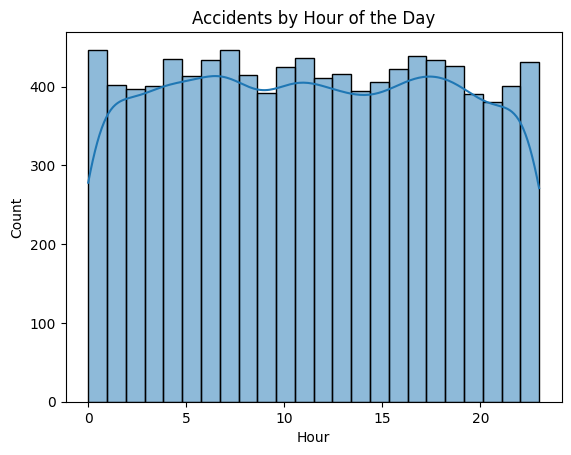

In [16]:
# Create the 'Hour' column
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

# Barplot – Road Condition vs Average Casualties

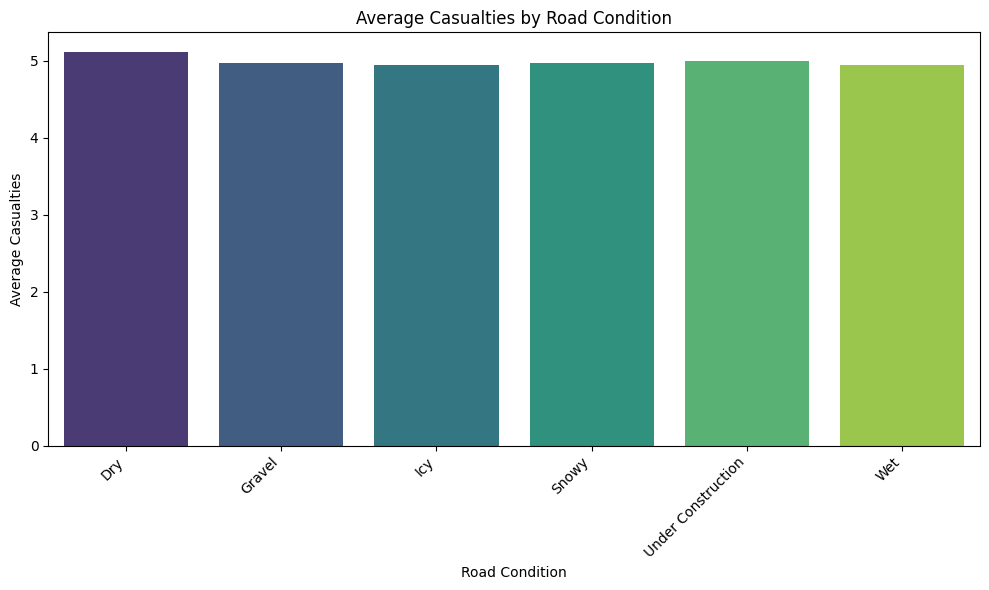

In [18]:
avg_casualties = df.groupby('Road Condition')['Casualties'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Road Condition', y='Casualties', data=avg_casualties, hue='Road Condition', palette='viridis', legend=False)
plt.title('Average Casualties by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Average Casualties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Countplot: Top 10 Most Common Causes of Accidents

/tmp/ipython-input-19-1776099385.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causes.values, y=top_causes.index, palette='flare')


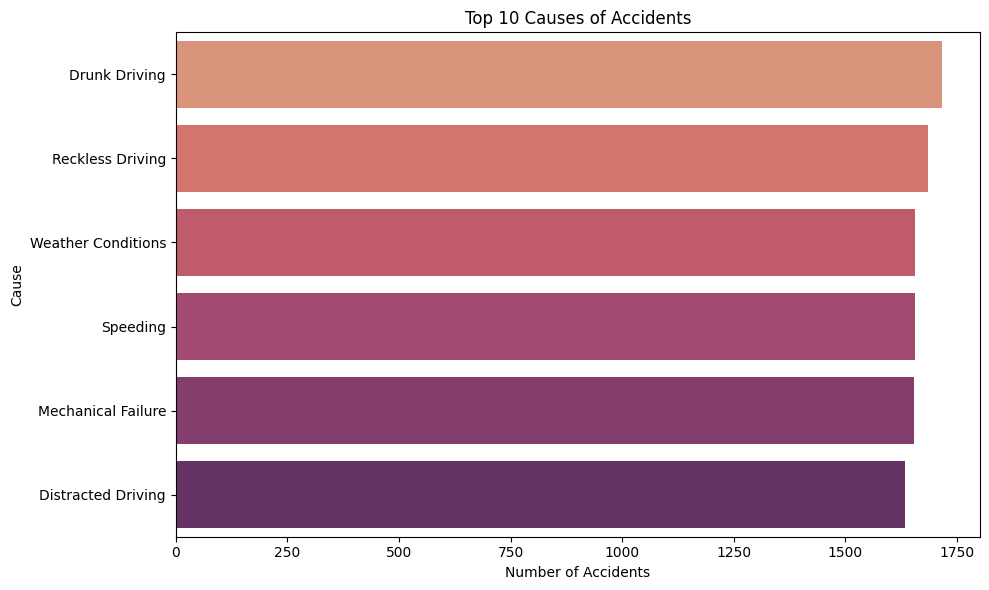

In [19]:
top_causes = df['Cause'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_causes.values, y=top_causes.index, palette='flare')
plt.title('Top 10 Causes of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause')
plt.tight_layout()
plt.show()

# Final Insights


---
* Most accidents occurred during afternoon hours (12 PM to 6 PM).ie,due to high traffic and movement during that period.  
* The majority of accidents happened during Rain weatther.
* Even on dry and gravel roads, severe accidents occurred, highlighting that road condition doesn't guarantee safety.  
* Weekends (Saturday & Sunday) show a wider range and higher number of casualties due to more travel or risky behavior.
* A few countries show significantly higher accident counts, possibly due to higher population or traffic density.  
* There’s a fluctuating trend in daily accident numbers, with certain months showing a noticeable peak in incidents.
* There’s a strong correlation between number of vehicles and casualties, indicating more vehicles often lead to more severe outcomes.
* Most accidents happen around rush hours.
* Poor road conditions tend to have higher average casualties, indicates the need for better road maintenance.  
* Speeding and distracted driving are the most frequent causes of traffic accidents.  
* So,behavioral change & Road maintenance is the key points to reduce accidents.